# **2017 Full-field Data, Treatment III**
***Objective:* produce averaged normalized spectra over all lazurite particles per sample using mask**

### Program: 
[Jupyter notebook 5.5.0, Python 3.6.5]

### Input: 
- normalized full-field XANES spectral cubes, type = .hdf5, [dataset22] ()
> H020_norm.hdf <br> H415_norm.hdf <br> H750_norm.hdf <br> H020oilL4_norm.hdf <br> H750oilL4_norm.hdf

- mask images, type = .png, [dataset24] ()
> mask_mean_value_H020_norm_date.png <br> 
mask_mean_value_H415_norm_date.png <br> 
mask_mean_value_H750_norm_date.png <br> 
mask_mean_value_H020oilL4_norm_date.png <br> 
mask_mean_value_H750oilL4_norm_date.png

### Steps:
- follow script below

### Output:
- average spectra over particles, type = .txt (tab-delimited), [dataset25] ()
- *note:* x = indices, y = average normalized intensity
> H020_norm_wanted_particles_average_date.txt <br> 
H415_norm_wanted_particles_average_date.txt <br> 
H750_norm_wanted_particles_average_date.txt <br> 
H020oilL4_norm_wanted_particles_average_date.txt <br> 
H750oilL4_norm_wanted_particles_average_date.txt <br> 

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

In [1]:
## enter today's date
date = '2019date'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tables
from scipy import ndimage
import skimage.measure 
import imageio
import numpy as np
import pandas as pd
import os
import scipy.misc
import matplotlib.pyplot as plt 

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Start here for each new file import...

Change directory below to where full field files are located...

In [6]:
cd dataset_22

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_22


In [7]:
figsize(16, 16)

In [9]:
##choose the normalized H- file to import

#filename = 'H020_norm.hdf'  ##for room temperature (ie 20 C) sample
filename = 'H415_norm.hdf'  ##for 415 C sample
#filename = 'H750_norm.hdf' ##for 750 C sample
#filename = 'H020oilL4_norm.hdf'    ##for 750 C sample plus oil and artificial aging
#filename = 'H750oilL4_norm.hdf'  ##for room temperature sample plus oil and artificial aging

##see other python sheet for 600 C sample

h5 = tables.open_file(filename)

In [10]:
##preparation for saving
basename, ext = os.path.splitext(filename)
basename, ext

('H415_norm', '.hdf')

In [11]:
##for all normalized files
data = h5.root.data[:] ##for normalized data, hdf
data.shape  ##want (energy, spatial 1, spatial 2)
#data.dtype

(140, 2179, 1720)

(2179, 1720)


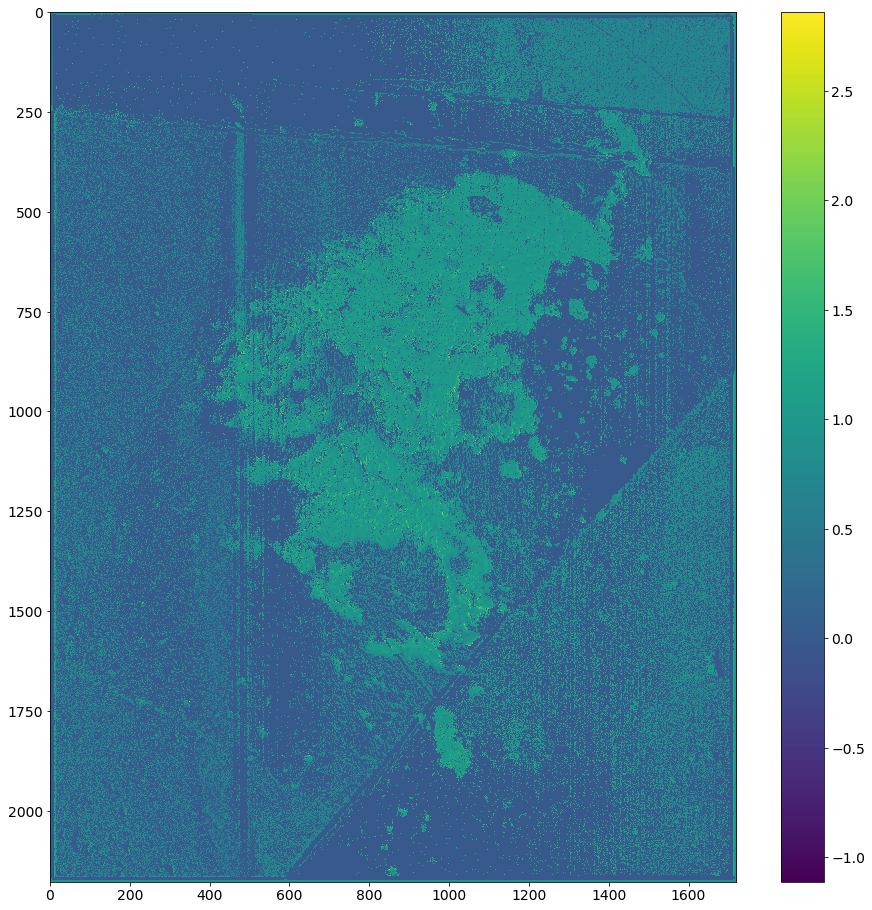

In [12]:
##calculates the mean intensity over all energies and displays as an image
mn = data.mean(axis=0)
print(mn.shape)
imshow(mn)
colorbar()

Move to folder where mask file is...

In [13]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets


In [15]:
cd dataset_24

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_24


In [16]:
mask_name = basename  ##name of sample that mean was made of
mask_date = '20190328'   ##data maske was made

fname = 'mask_mean_value_%s_%s.png' %(mask_name, mask_date) ##at %s adds basename into string so calls on the mask mean image
fname

'mask_mean_value_H415_norm_20190328.png'

In [17]:
mask = imageio.imread(fname)
#mask.shape
imshow(mask[...,-1])

FileNotFoundError: No such file: 'C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_24\mask_mean_value_H415_norm_20190328.png'

In [37]:
#mask.dtype
mask[...,-1].max(), mask[...,-1].min() 

(255, 0)

In [1]:
##making a boolean matrix for the last channel (-1, transparency) of the alpha channel where the value is >128
##128, because it's 8 bit, so 0 to 255 and 128 is halfway, so weaker signal assume is 0, and stronger signal assume is 1
wanted = mask[...,-1] > 128
print(wanted.dtype)
#print(wanted) ##if you want to see it
imshow(wanted) ##only the particles

NameError: name 'mask' is not defined

In [48]:
##need mask and data to be aligned, check shapes
##if first two dimensions (ie spatial dimensions) do not match, fix with transpose
##for all files but H-600, must perform transpose in next cell
print(wanted.shape)
print(data.shape) ##output shows it is energy x spatial 1 x spatial 2

(1720, 1670)
(140, 1720, 1670)


In [51]:
##transposes so shapes are aligned
d = data.transpose(1, 2, 0)
d.shape   ##should match 'wanted' now for first two dimensions

(1720, 1670, 140)

In [53]:
##selects all values in d that match wanted requirements, so all spectra whose mean gave an intensity >128 in image
#d[wanted].shape  ##just to see shape can write this way too, but also shown in two lines
wanted_data = d[wanted]
wanted_data.shape   ##(number of spectra meeting requirement, # of energies measured)

(312653, 140)

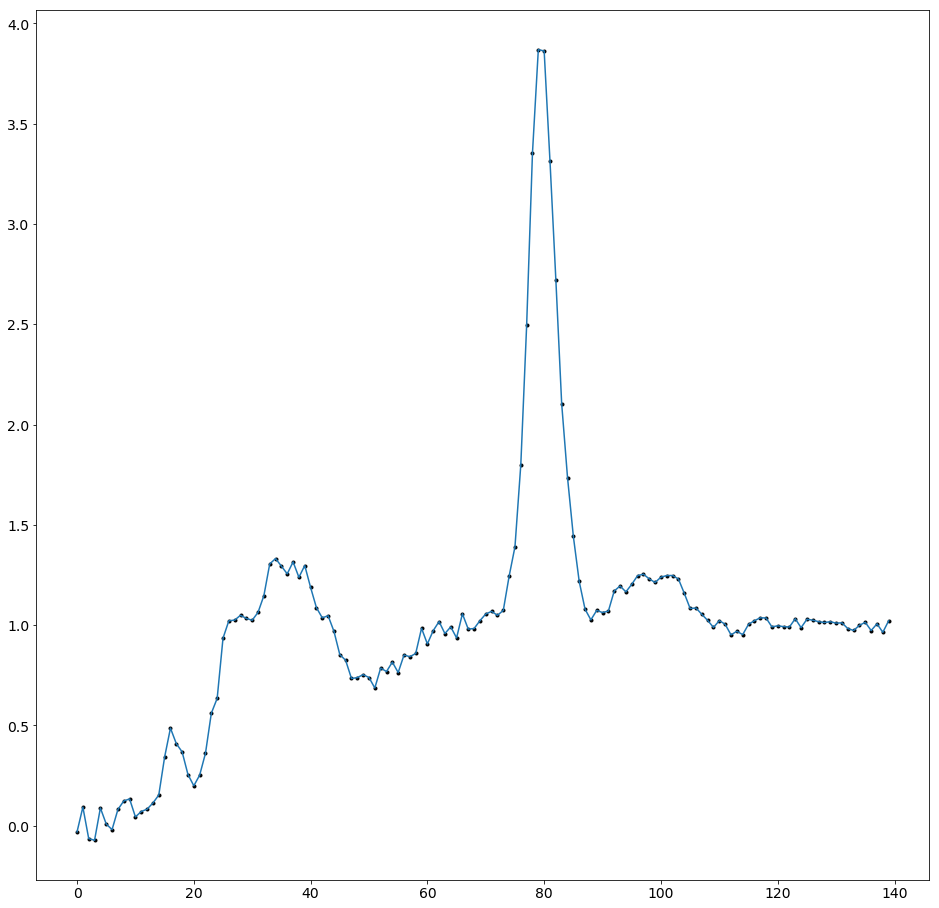

In [55]:
##plot of mean spectra over all particles
##where x = array of 140 ('wanted_data.shape[1]') and y = the mean over all selected spectra ('wanted_data.mean(axis=0)')
##the 1 calls axis = 1 in wanted_data.shape printed above
##axis = 0 calls the other postion but actually in wanted_data (not in .shape) those spectra meeting the requirement

wanted_data_mn = wanted_data.mean(axis=0)
plot(arange(wanted_data.shape[1]), wanted_data_mn, 'k.')  ##k. means black and dots
plt.plot(arange(wanted_data.shape[1]), wanted_data_mn)  ##gives the line over it

In [56]:
##making array of x values to save
x_data = np.arange(wanted_data.shape[1])
x_data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

In [57]:
##array of data to save
frames = [pd.DataFrame(x_data), pd.DataFrame(wanted_data_mn)]
save_bits = pd.concat(frames, axis = 1)
save_bits

,0,0
0,0,-0.031213
1,1,0.092462
2,2,-0.064462
3,3,-0.072891
4,4,0.088120
5,5,0.008211
6,6,-0.019758
7,7,0.080578
8,8,0.122883
9,9,0.133457


Change directory to where you want to save mean spectrum of all particles

In [19]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets


In [21]:
cd dataset_25

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_25


In [61]:
##saving csv of mean data 

np.savetxt(basename + '_wanted_particles_average_' + date + '.txt', save_bits, delimiter ='\t')

### continue to sheet '06b_2017FF_Treatment-III...' for H-600 and  '07_2017FF_Treatment-IV...' for all